# Data Visualization
## Import Library

Sekarang kita akan menganalisis tindak kriminal yang terjadi di London dalam file CSV 127MB.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Baca dataset yang kita gunakan dengan <b>.read_csv()</b> dan dataset ini akan kita simpan sebagai objek DataFrame di variabel <b>'df'</b>.

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.sort_values(by='value', ascending=False, inplace=True)

Lihat data!

In [3]:
df.head(2)

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3


Terdapat 7 variabel, berikut penjelasannya:
- <b>lsoa_code,</b> adalah kode wilayah
- <b>borough,</b> adalah distrik 
- <b>major_category,</b> adalah jenis kejahatan berat
- <b>minor_category,</b> adalah jenis kejahatan ringan
- <b>value,</b> adalah jumlah kejadian yang terjadi di tiap distrik dalam sebulan
- <b>year,</b> adalah tahun kejadian
- <b>month,</b> adalah bulan kejadian

In [4]:
df.shape

(13490604, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13490604 entries, 1608904 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 823.4+ MB


In [6]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Cleaning

Sebelum analisa kita lakukan, mari kita bersihkan terlebih dahulu data kita, agar hasil analisa yang lebih baik dan tidak terganggu missing values maupun invalid values.

In [7]:
df.drop(columns=['lsoa_code'], axis=1, inplace=True)

Mari cek terlebih dahulu apakah terdapat missing values.

In [8]:
df.isna().sum()

borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Setiap kolom menunjukkan output '0', artinya <b>Tidak ada missing values</b> pada kolom manapun.

Mari cek apakah terdapat value yang terduplikat.

In [9]:
df.duplicated().sum()

13005859

Output '13005859', artinya <b>Terdapat duplikat yang begitu banyak pada data.</b>. Mari kita lakukan pembersihan dengan <b>.drop_duplicates()</b>!

In [10]:
df.drop_duplicates(keep=False, inplace=True)

In [11]:
df.duplicated().sum()

0

Output '0', artinya <b>Tidak ada duplikat</b>.

## Exploratory Data Analysis

In [12]:
df['borough'].value_counts()

Westminster               9872
Camden                    5600
Lambeth                   4347
Newham                    4298
Islington                 4258
Croydon                   4233
Hammersmith and Fulham    4151
Southwark                 3969
Ealing                    3949
Hillingdon                3780
Tower Hamlets             3729
Kingston upon Thames      3647
Hackney                   3551
Haringey                  3534
Waltham Forest            3528
Wandsworth                3485
Havering                  3479
Kensington and Chelsea    3345
Greenwich                 3291
Bromley                   3240
Redbridge                 3212
Barking and Dagenham      3206
Lewisham                  3175
Brent                     3101
Enfield                   2973
Hounslow                  2969
Sutton                    2926
Barnet                    2883
Richmond upon Thames      2725
Harrow                    2658
Bexley                    2648
Merton                    2641
City of 

<AxesSubplot:>

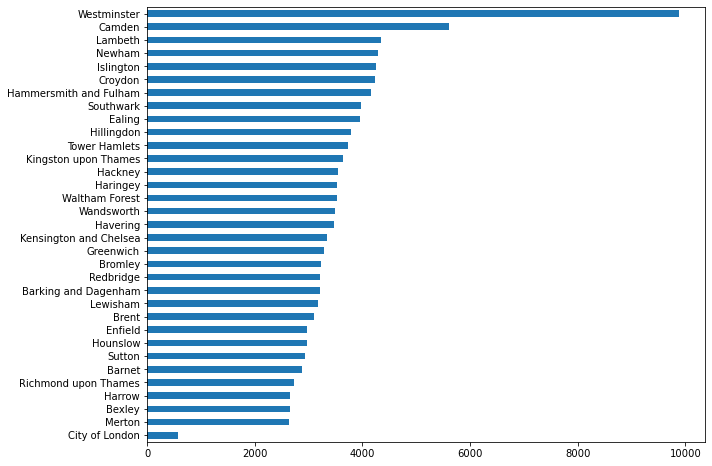

In [13]:
df['borough'].value_counts(ascending=True).plot(kind='barh',
                                                figsize=(10, 8))

Menurut Dataset:
- Westminster adalah distrik dengan jumlah kasus kriminal tertinggi.
- City of London adalah distrik dengan jumlah kasus kriminal terendah.

In [14]:
maj_cols = df.copy()
maj_cols.drop(columns=['minor_category'], inplace=True)
maj_cols.set_index('borough', inplace=True)

min_cols = df.copy()
min_cols.drop(columns=['major_category'], inplace=True)
min_cols.set_index('borough', inplace=True)

In [15]:
print(maj_cols.isnull().sum())
print(min_cols.isnull().sum())

major_category    0
value             0
year              0
month             0
dtype: int64
minor_category    0
value             0
year              0
month             0
dtype: int64


In [16]:
print(maj_cols.duplicated().sum())
print(min_cols.duplicated().sum())

103160
86992


In [17]:
maj_cols.drop_duplicates(keep=False, inplace=True)
min_cols.drop_duplicates(keep=False, inplace=True)

In [18]:
print(maj_cols.duplicated().sum())
print(min_cols.duplicated().sum())

0
0


<b>Question:</b> Kasus kejahatan terbanyak dan paling sedikit yang terjadi di Westminster?

In [19]:
west_maj = maj_cols.loc['Westminster']
print('Kasus Major Tertinggi:', west_maj.max())

west_min = min_cols.loc['Westminster']
print('Kasus Minor Tertinggi:', west_min.max())

Kasus Major Tertinggi: major_category    Violence Against the Person
value                                     300
year                                     2016
month                                      12
dtype: object
Kasus Minor Tertinggi: minor_category    Wounding/GBH
value                      300
year                      2016
month                       12
dtype: object


- <b>Violence Against the Person</b> pada bulan Desember, 2016 adalah kasus terbanyak yang terjadi di Westminster yaitu sebanyak 300 kasus.
- <b>Wounding/GBH</b> pada bulan Desember, 2016 adalah kasus terbanyak yang terjadi di Westminster yaitu sebanyak 300 kasus.

<b>Question:</b> Kasus kejahatan terbanyak yang terjadi di City of London?

In [20]:
london_maj = maj_cols.loc['City of London']
print('Kasus Major Tertinggi:', london_maj.max())

london_min = min_cols.loc['City of London']
print('Kasus Minor Tertinggi:', london_min.max())

Kasus Major Tertinggi: major_category    Violence Against the Person
value                                       2
year                                     2016
month                                      12
dtype: object
Kasus Minor Tertinggi: minor_category    Wounding/GBH
value                        4
year                      2016
month                       12
dtype: object


- <b>Violence Against the Person</b> pada bulan Desember, 2016 adalah kasus terbanyak yang terjadi di Westminster yaitu sebanyak 12 kasus.
- <b>Wounding/GBH</b> pada bulan Desember, 2016 adalah kasus terbanyak yang terjadi di Westminster yaitu sebanyak 12 kasus.

## Analisa berdasarkan major_category

In [21]:
df['major_category'].value_counts()

Theft and Handling             53388
Violence Against the Person    25165
Criminal Damage                11241
Drugs                          10648
Burglary                        8307
Robbery                         5510
Other Notifiable Offences       4453
Fraud or Forgery                 205
Sexual Offences                   67
Name: major_category, dtype: int64

<AxesSubplot:>

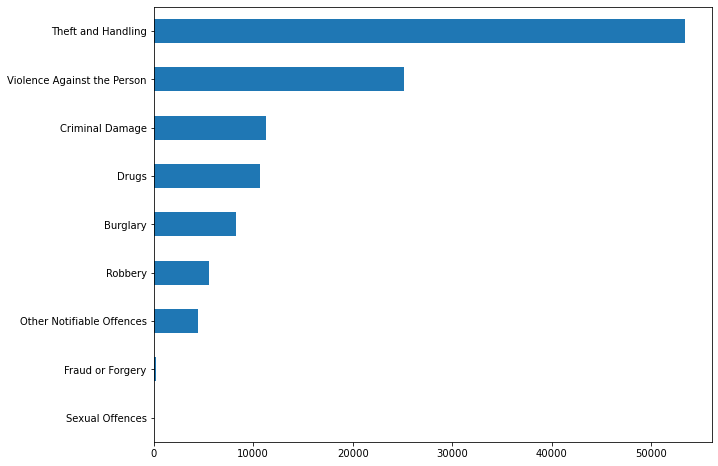

In [22]:
df['major_category'].value_counts(ascending=True).plot(kind='barh', figsize=(10,8))

Menurut Dataset:
- Theft and Handling adalah kejahatan kelas major dengan jumlah laporan kasus terbanyak, sebanyak 53.388 kasus (2008-2016).
- Sexual Offences  adalah kejahatan kelas major dengan jumlah laporan kasus paling sedikit, sebanyak 67 kasus (2008-2016).

<b>Question:</b> Laporan kasus kejahatan kelas major tertinggi?

In [23]:
maj_cols.max()

major_category    Violence Against the Person
value                                     309
year                                     2016
month                                      12
dtype: object

Laporan kasus kejahatan kelas major tertinggi terjadi di pada Desember, 2016 yaitu <b>'Violence Against the Person'</b>, sejumlah <b>309 kasus</b>.

## Analisa berdasarkan minor_category

In [24]:
df['minor_category'].value_counts()

Other Theft                               15766
Theft From Shops                          13715
Other Theft Person                         9052
Possession Of Drugs                        7595
Assault with Injury                        5581
Harassment                                 5545
Theft From Motor Vehicle                   5445
Common Assault                             5278
Burglary in Other Buildings                4734
Personal Property                          4173
Theft/Taking of Pedal Cycle                4070
Criminal Damage To Motor Vehicle           3770
Burglary in a Dwelling                     3573
Wounding/GBH                               3158
Other violence                             3125
Other Notifiable                           3026
Other Criminal Damage                      2789
Criminal Damage To Other Building          2578
Theft/Taking Of Motor Vehicle              2285
Criminal Damage To Dwelling                2104
Drug Trafficking                        

<AxesSubplot:>

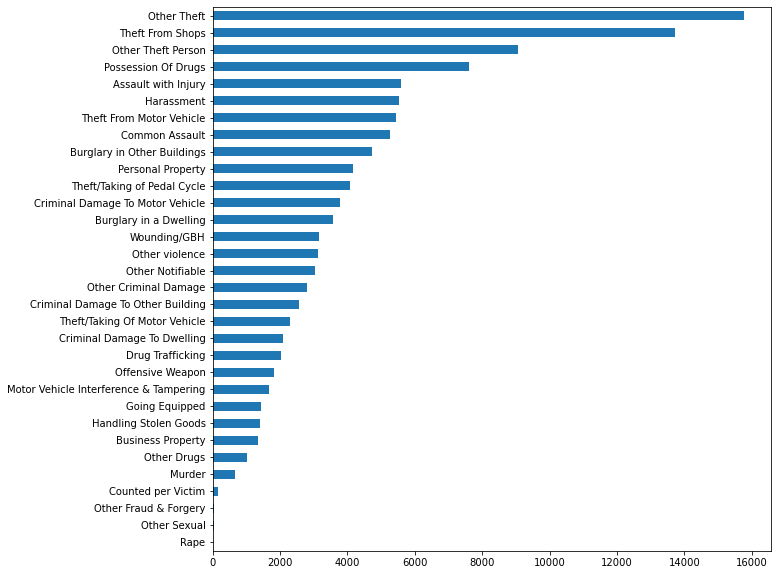

In [25]:
df['minor_category'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 10))

Menurut Dataset:

- Other theft adalah kejahatan kelas minor dengan jumlah laporan kasus terbanyak, sebanyak 15.766 kasus (2008-2016).
- Rape adalah kejahatan kelas minor dengan jumlah laporan kasus paling sedikit, sebanyak 27 kasus (2008-2016).

<b>Question:</b> Kapan laporan kasus kejahatan kelas minor paling banyak terjadi?

In [26]:
min_cols.max()

minor_category    Wounding/GBH
value                      309
year                      2016
month                       12
dtype: object

Laporan kasus kejahatan kelas minor tertinggi terjadi pada Desember, 2016 yaitu <b>'Wounding/GBH'</b>, sejumlah <b>309 kasus</b>.

## Analisa Seluruhnya

In [27]:
all_ = pd.pivot_table(df,
               values='value',
               index='borough',
               columns='year',
               aggfunc=np.sum)

all_ = all_.T
all_.loc['Total'] = all_.sum()
all_ = all_.T

all_.sort_values(by='Total', ascending=False, inplace=True)
all_.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,25223,26836,26741,30629,34005,30135,23533,22428,21902,241432
Camden,8602,9190,9130,10137,9272,7750,5988,6403,5950,72422
Newham,3789,3356,3998,3430,5289,4787,4956,5819,6041,41465
Islington,5710,4883,4953,4906,4934,3803,3288,3932,4343,40752
Lambeth,3669,3552,3950,4149,5385,4958,4589,5054,5118,40424


In [28]:
print('missing values:', all_.isnull().sum())
print('duplikat:', all_.duplicated().sum())

missing values: year
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
Total    0
dtype: int64
duplikat: 0


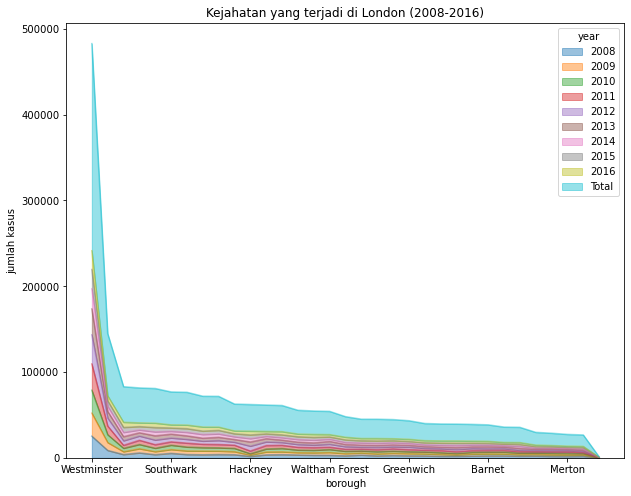

In [29]:
all_.plot(kind='area',
          figsize=(10,8),
          alpha=0.45)

plt.title('Kejahatan yang terjadi di London (2008-2016)')
plt.xlabel('borough')
plt.ylabel('jumlah kasus')

plt.show()

<b>Question:</b> 5 Distrik dengan kasus kejahatan tertinggi (2008-2016).

In [30]:
all_.sort_values(by='Total', ascending=False, inplace=True)
all_top = all_['Total'].head(5)
print(all_top)

borough
Westminster    241432
Camden          72422
Newham          41465
Islington       40752
Lambeth         40424
Name: Total, dtype: int64


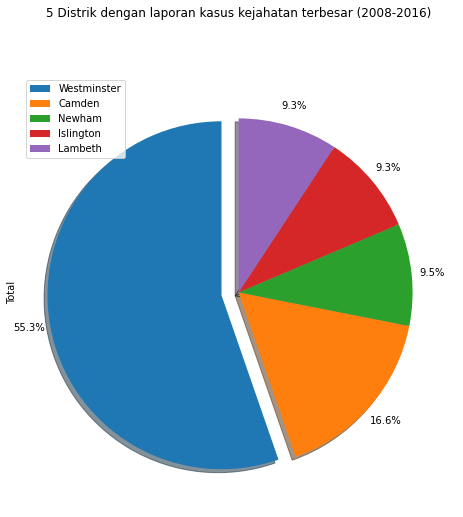

In [31]:
all_['Total'].head().plot(kind='pie',
                 figsize=(10,8),
                 autopct='%1.1f%%',
                 startangle=90,
                 shadow=True,
                 labels=None,
                 pctdistance=1.12,
                 explode=[0.1, 0, 0, 0, 0])

plt.title('5 Distrik dengan laporan kasus kejahatan terbesar (2008-2016)', y=1.12)
plt.legend(labels=all_.index, loc='upper left')

plt.show()

5 distrik dengan laporan kasus kejahatan terbesar (2008-2016), yaitu:
- Westminster sebanyak 241.432 kasus
- Camden sebanyak 72.422 kasus
- Newham sebanyak 41.465 kasus
- Islington sebanyak 40.752 kasus
- Lambeth sebanyak 40.424 kasus

## Analisa Distrik dengan Kasus Kejahatan terbanyak (2008-2016)

<b>Question:</b> Kapan tingkat kejahatan di Westminster begitu sering terjadi dan berapa angka rata-rata kasus per tahunnya (2008-2016)?

In [32]:
all_.sort_values(by='Total', ascending=False, inplace=True)
all_top = all_['Total'].head(1)
print(all_top)

borough
Westminster    241432
Name: Total, dtype: int64


Westminster memiliki <b>total kasus</b> yang telah terjadi selama 2008-2016 adalah <b>241.432 kasus<b>.

In [33]:
all_wes = all_.loc[['Westminster']]
all_wes.drop(columns=['Total'], inplace=True)
all_wes = all_wes.T
all_wes

borough,Westminster
year,
2008,25223
2009,26836
2010,26741
2011,30629
2012,34005
2013,30135
2014,23533
2015,22428
2016,21902


Text(0, 0.5, 'Jumlah kasus')

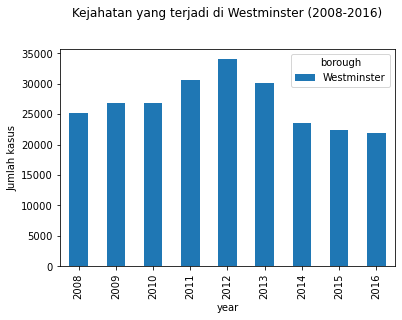

In [34]:
all_wes.plot(kind='bar')

plt.title('Kejahatan yang terjadi di Westminster (2008-2016)', y=1.12)
plt.xlabel('year')
plt.ylabel('Jumlah kasus')

Tahun 2012, merupakan tahun dimana di Westminster angka laporan kasus kejahatan beratnya sangat tinggi, yaitu terdapat <b>34.005 kasus</b>.

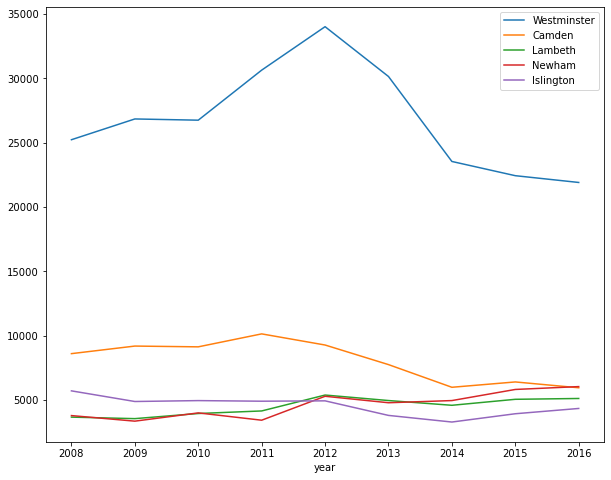

In [36]:
all_wes = all_.loc[['Westminster',
                    'Camden',
                    'Lambeth',
                    'Newham',
                    'Islington']]
all_wes.drop(columns=['Total'], inplace=True)
all_wes = all_wes.T

all_wes.plot(figsize=(10,8))

plt.legend(labels=all_wes, loc='upper right')

Dari plot diatas, terlihat jelas betapa parahnya kasus kejahatan yang ada di Westminster sejak 2008 sampai 2016, padahal itu adalah penggambaran antara 5 distrik dengan tingkat kejahatan tertinggi di London.

## Analisa per-Year dan per-Month

<b>Question:</b> Boxplot yang antara borough dengan month.

In [37]:
all_bx = all_.copy()
all_bx.drop(columns=['Total'], inplace=True)

all_bx.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Westminster,25223,26836,26741,30629,34005,30135,23533,22428,21902
Camden,8602,9190,9130,10137,9272,7750,5988,6403,5950
Newham,3789,3356,3998,3430,5289,4787,4956,5819,6041
Islington,5710,4883,4953,4906,4934,3803,3288,3932,4343
Lambeth,3669,3552,3950,4149,5385,4958,4589,5054,5118


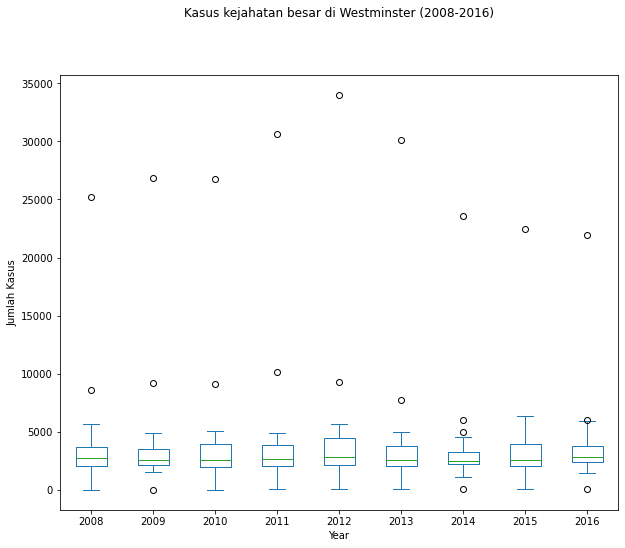

In [38]:
all_bx.plot(kind='box', figsize=(10,8))
plt.title('Kasus kejahatan besar di Westminster (2008-2016)', y=1.12)
plt.xlabel('Year')
plt.ylabel('Jumlah Kasus')

plt.show()

<b>Question:</b> Boxplot yang antara borough dengan month.

In [39]:
all_month = pd.pivot_table(df,
               values='value',
               index='borough',
               columns='month',
               aggfunc='sum', sort=True)
all_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
borough,,,,,,,,,,,,
Barking and Dagenham,1599,1642,1843,1636,1756,1709,1967,1546,1452,1610,1606,1650
Barnet,1494,1598,1602,1611,1667,1546,1617,1466,1498,1568,1800,1761
Bexley,1166,962,1252,1045,1190,1179,1083,856,1049,1158,1187,1204
Brent,1471,1657,1600,1566,1665,1550,1724,1625,1502,1921,1642,1811
Bromley,1851,1823,1947,1824,1964,1751,1962,1585,1649,2082,2043,2046


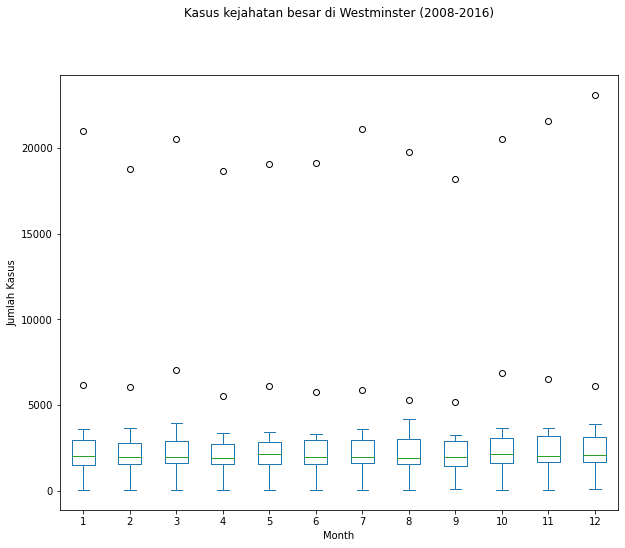

In [40]:
all_month.plot(kind='box', figsize=(10,8))
plt.title('Kasus kejahatan besar di Westminster (2008-2016)', y=1.12)
plt.xlabel('Month')
plt.ylabel('Jumlah Kasus')

plt.show()

## Stopwords

In [41]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [42]:
stopwords = set(STOPWORDS)

In [43]:
source_dataset = ' '.join(df.borough)

In [44]:
locrime = WordCloud(
background_color='white',
max_words=2000,
stopwords=stopwords
)

In [45]:
locrime.generate(source_dataset)

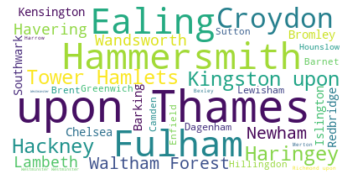

In [46]:
plt.imshow(locrime, interpolation='bilinear')
plt.axis('off')
plt.show()